In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [1]:
import numpy as np
import csv

In [2]:
def process(dataList):
    dataList = [p[0:4] for p in dataList]
    dataList = [[int(elem) for elem in p] for p in dataList]

    if(len(dataList) < 15):
        return None
    
    for j in range(0, len(dataList)):
        dataList[j].append(dataList[j][0] - dataList[j][1])
        dataList[j].append(dataList[j][2] - dataList[j][3])
        
        

    for thresh in range(30, 15, -1):
        num = -1
        for i in range(len(dataList)):
            for j in range(0, 4):
                if dataList[i][j] > thresh:
                    num = i
                    break
        
        if num == -1:
            continue

        if num + 10 < len(dataList) and num - 5 > 0:
            return dataList[num-5:num+10]
        if num -5 > 0:
            return dataList[-16:-1]
        return dataList[0:15]
    
    return None


In [4]:
myData = []
myLabels = []
for i in range(1, 1000):
    with open('left/left_' + str(i) + '.csv', newline = '') as csvfile:
        f = list(csv.reader(csvfile))
        g = process(f)
        if (g != None):
            myData.append(g)
            myLabels.append(1)

for i in range(1, 1000):
    with open('right/right_' + str(i) + '.csv', newline = '') as csvfile:
        f = list(csv.reader(csvfile))
        g = process(f)
        if (g != None):
            myData.append(g)
            myLabels.append(3)
for i in range(1, 1000):
    with open('up/up_' + str(i) + '.csv', newline = '') as csvfile:
        f = list(csv.reader(csvfile))
        g = process(f)
        if (g != None):
            myData.append(g)
            myLabels.append(0)
for i in range(1, 1000):
    with open('down/down_' + str(i) + '.csv', newline = '') as csvfile:
        f = list(csv.reader(csvfile))
        g = process(f)
        if (g != None):
            myData.append(g)
            myLabels.append(2)    
for i in range(105, 1104):
    with open('nothing/nothing_' + str(i) + '.csv', newline = '') as csvfile:
        f = list(csv.reader(csvfile))
        g = process(f)
        if (g != None):
            myData.append(g)
            myLabels.append(4)    

for i in range(0, len(myData)):
    if (len(myData[i]) != 15):
        print(i)




In [5]:
myTrainData = [myData[i] for i in range(0, len(myData)) if i % 5 != 0 and i % 5 != 3]
myTrainLabels = [myLabels[i] for i in range(0, len(myData)) if i % 5 != 0 and i % 5 != 3]
myTestData = [myData[i] for i in range(0, len(myData)) if i % 5 == 0]
myTestLabels = [myLabels[i] for i in range(0, len(myData)) if i % 5 == 0]
myFinalTestData = [myData[i] for i in range(0, len(myData)) if i % 5 == 3]
myFinalTestLabels = [myLabels[i] for i in range(0, len(myData)) if i % 5 == 3]

In [6]:
myTrainDataNP = np.array(myTrainData)
myTrainLabelsNP = np.array(myTrainLabels)
myTestDataNP = np.array(myTestData)
myTestLabelsNP = np.array(myTestLabels)
myFinalTestDataNP = np.array(myFinalTestData)
myFinalTestLabelsNP = np.array(myFinalTestLabels)

print((type)(myTrainDataNP))
print(np.shape(myTrainDataNP))
print(np.shape(myTrainLabelsNP))
print(np.shape(myTestDataNP))
print(np.shape(myTestLabelsNP))
print(np.shape(myFinalTestDataNP))
print(np.shape(myFinalTestLabelsNP))

<class 'numpy.ndarray'>
(2819, 15, 6)
(2819,)
(940, 15, 6)
(940,)
(940, 15, 6)
(940,)


In [7]:
# Cell 1: Import necessary libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset

In [9]:
#Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
])

# Create DataLoaders
trainloader = DataLoader(myTrainDataNP, batch_size=10, shuffle=True)
testloader = DataLoader(myTestDataNP, batch_size=10, shuffle=False)

In [10]:
import numpy as np
import struct
import os
from torch.utils.data import Dataset, DataLoader
import torch

# Helper function to load images from IDX file
def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
        return images

# Helper function to load labels from IDX file
def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

from torch.utils.data import Dataset
import torchvision.transforms as transforms

class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Convert the image to a float tensor and normalize it
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0) / 255.0  # Add channel dimension and normalize
        if self.transform:
            image = self.transform(image)

        return image, label

    
# Define the transform
transform = transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
# Create datasets
train_dataset = MNISTDataset(myTrainData, myTrainLabels, transform=transform)
test_dataset = MNISTDataset(myTestData, myTestLabels, transform=transform)

# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [13]:
import numpy as np
import struct
import os
from torch.utils.data import Dataset, DataLoader
import torch

from torch.utils.data import Dataset
import torchvision.transforms as transforms

class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Convert the image to a float tensor and normalize it
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0) / 255.0  # Add channel dimension and normalize
        if self.transform:
            image = self.transform(image)

        return image, label

# Define the transform
transform = transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
# Create datasets
print((type)(myData))
train_dataset = MNISTDataset(myTrainDataNP, myTrainLabelsNP, transform=transform)
test_dataset = MNISTDataset(myTestDataNP, myTestLabelsNP, transform=transform)

# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
print(trainloader)
print((type)(trainloader))
# for batch_images, batch_labels in trainloader:
    # print(f"Batch shape: {batch_images.shape}, Labels: {batch_labels}")
testloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

<class 'list'>
<class 'torch.utils.data.dataloader.DataLoader'>


In [14]:
#Define the simple neural network without hidden layers
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.linear = nn.Linear(6 * 15, 5)  # Input size 784, output size 10 (for digits 0-9)

    def forward(self, x):
        x = x.view(-1, 6 * 15)  # Flatten the image from (28, 28) to (784,1)

        return self.linear(x)

# Create an instance of the model
model = SimpleNet()

In [15]:
#Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.02) # 0.0005

In [20]:
final_test_dataset = MNISTDataset(myFinalTestDataNP, myFinalTestLabelsNP, transform=transform)
finaltestloader = DataLoader(final_test_dataset, batch_size=1, shuffle=True)

Epoch [1/10], Loss: 1.1964, Training Accuracy: 48.60%, Test Accuracy: 54.36%
Epoch [2/10], Loss: 1.0184, Training Accuracy: 56.69%, Test Accuracy: 52.13%
Epoch [3/10], Loss: 0.9422, Training Accuracy: 60.52%, Test Accuracy: 50.85%
Epoch [4/10], Loss: 0.8788, Training Accuracy: 63.99%, Test Accuracy: 60.53%
Epoch [5/10], Loss: 0.8481, Training Accuracy: 64.24%, Test Accuracy: 65.11%
Epoch [6/10], Loss: 0.8066, Training Accuracy: 67.15%, Test Accuracy: 75.43%
Epoch [7/10], Loss: 0.7826, Training Accuracy: 69.28%, Test Accuracy: 63.09%
Epoch [8/10], Loss: 0.7574, Training Accuracy: 70.95%, Test Accuracy: 83.40%
Epoch [9/10], Loss: 0.7388, Training Accuracy: 72.12%, Test Accuracy: 78.09%
Epoch [10/10], Loss: 0.7300, Training Accuracy: 72.37%, Test Accuracy: 73.09%
tensor([[ 3.4784,  1.7145, -4.0088,  2.3711, -2.7746]])
tensor([0])
tensor([0])
tensor([[ 4.3379,  0.6713, -7.0512, -3.6448,  7.3669]])
tensor([4])
tensor([4])
tensor([[-0.9458,  4.6433,  1.7880,  0.5488, -5.2756]])
tensor([1])
t

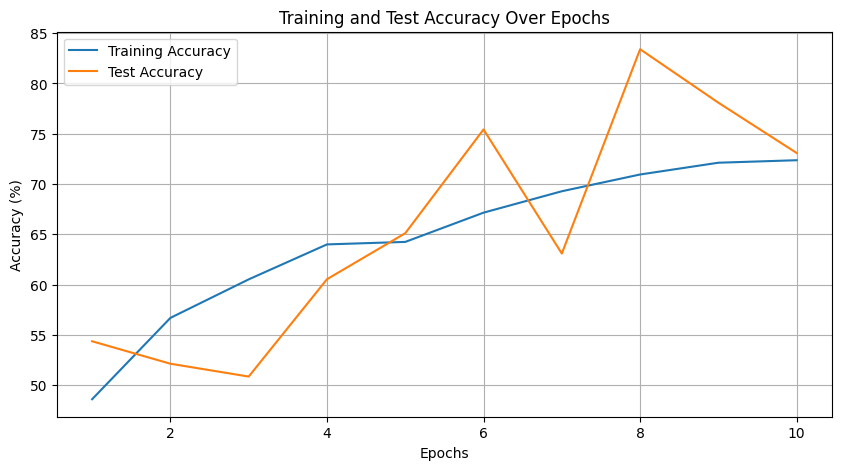

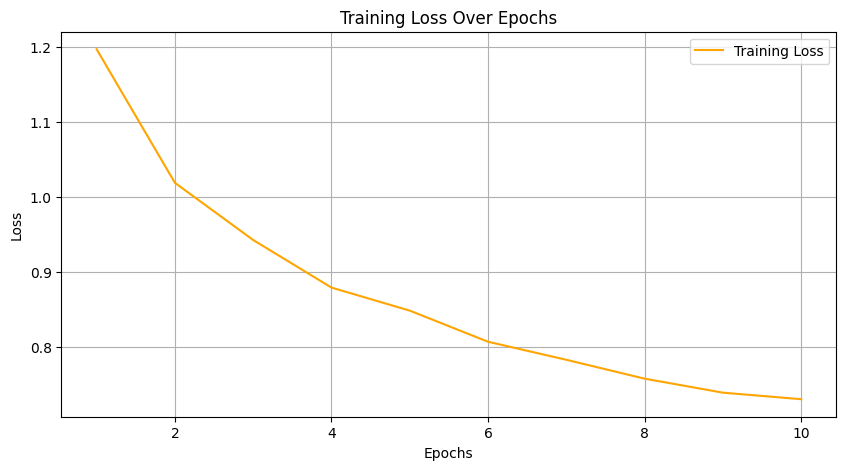

In [30]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Lists to store accuracy and loss values for plotting
train_accuracies = []
test_accuracies = []
train_losses = []

# Train the model and store training/test accuracy and loss
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()  # Set the model to training mode
    # print(trainloader)
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear previous gradients
        
        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    avg_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total

    # Store the loss and accuracy
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    model.eval()  # Set the model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # No gradient computation during testing
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Print training loss, training accuracy, and test accuracy for the epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

totalw = 0
totala = 0
totals = 0
totald = 0
totalnothing = 0

totalpw = 0
totalpa = 0
totalps = 0
totalpd = 0
totalpnothing = 0

ivxv = 0

with torch.no_grad():  # No gradient computation during testing
    for images, labels in finaltestloader:
        ivxv += 1
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        if ivxv < 40:
            print(outputs)
            print(labels)
            print(predicted)
        if predicted == 0:
            totalpw += 1
        if predicted == 1:
            totalpa += 1
        if predicted == 2:
            totalps += 1
        if predicted == 3:
            totalpd += 1
        if predicted == 4:
            totalpnothing += 1
        if labels == 0:
            totalw += 1
        if labels == 1:
            totala += 1
        if labels == 2:
            totals += 1
        if labels == 3:
            totald += 1
        if labels == 4:
            totalnothing += 1
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
print(totalw)
print(totalpw)
print(totala)
print(totalpa)
print(totals)
print(totalps)
print(totald)
print(totalpd)
print(totalnothing)
print(totalpnothing)

test_accuracy = 100 * test_correct / test_total

print(f'Final Test Accuracy: {test_accuracy:.2f}%')

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import pickle

In [ ]:
with open('newmodel.pkl', 'wb') as f:
    pickle.dump(model, f)

Now we want to input our own image and see if the neural network can recognize it. You can add a function to preprocess a given image and pass it through the trained model.

# Steps for Students:
1. Take a photo of a handwritten digit or download one.
2. Rename the file (e.g., digit_image.png) and save it in the notebook's directory.
3. Run the predict_image() function with the file name to see the prediction.

In [ ]:
import os
# you can use this commands to find th edirectory of your jupyter notebook
# Print the current working directory
print("Your Jupyter Notebook is running in this directory:")
print(os.getcwd())

wasd is 0123
Using model: SimpleNetWithHiddenLayer


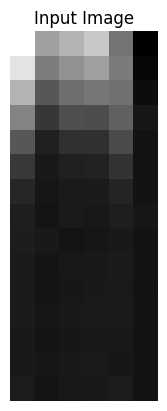

Predicted Label: 2
up/up_1.csv
Using model: SimpleNetWithHiddenLayer


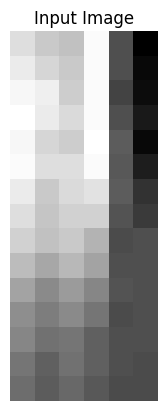

Predicted Label: 2
left/left_1.csv
Using model: SimpleNetWithHiddenLayer


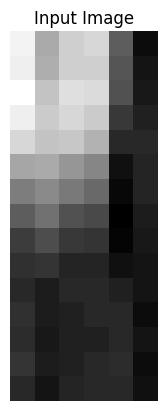

Predicted Label: 2
down/down_1.csv
Using model: SimpleNetWithHiddenLayer


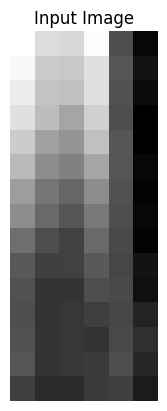

Predicted Label: 2
right/right_1.csv
0.25


In [142]:
from PIL import Image
import numpy as np

# Function to preprocess and predict a given image
def predict_image(image_path, model):
    model.eval()  # Set the model to evaluation mode

    # Load and preprocess the image
    # image = Image.open(image_path).convert('L')  # Convert to grayscale
    # image = image.resize((28, 28))  # Resize to 28x28 pixels
    file = open(image_path, newline = '')
    file = list(csv.reader(file))
    image = process(file)
    if (image == None):
        return None
    print(f"Using model: {model.__class__.__name__}")
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image_array = (image_array - 0.5) / 0.5  # Normalize to [-1, 1] to match training



    # Check for potential problems like inverted colors
    # if image_array.mean() > 0.5:  # If the background is dark and digits are light
    #     image_array = 1 - image_array  # Invert colors to match MNIST format

    image_tensor = torch.tensor(image_array, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

    # Display the image
    plt.imshow(image_array, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    plt.show()

    # Run the image through the model and get the prediction
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_label = torch.max(output, 1)

    # Print the predicted label
    print(f'Predicted Label: {predicted_label.item()}')
    return (predicted_label.item())

# Test the function with an uploaded image
# image_path = 'camer.png'  # Replace with the path to your image
correct = 0
tests = 0
print('wasd is 0123')
for i in range(1, 2):
    image_path = 'up/up_' + str(i) + '.csv'  # Replace with the path to your image
    a = predict_image(image_path, model)
    if (a == 0):
        correct += 1
    print(image_path)
    image_path = 'left/left_' + str(i) + '.csv'  # Replace with the path to your image
    a = predict_image(image_path, model)  
    if (a == 1):
        correct += 1
    print(image_path)
    image_path = 'down/down_' + str(i) + '.csv'  # Replace with the path to your image
    a = predict_image(image_path, model)  
    if (a == 2):
        correct += 1
    print(image_path)
    image_path = 'right/right_' + str(i) + '.csv'  # Replace with the path to your image
    a = predict_image(image_path, model) 
    if (a == 3):
        correct += 1
    print(image_path)
    tests += 4
print(correct / tests)
# image_path = 'right/right_87.csv'  # Replace with the path to your image
# predict_image(image_path, model)

## Neural Network with one hidden layer

A hidden layer in a neural network is a layer of neurons located between the input and output layers. It allows the network to learn and represent more complex patterns and relationships in the data by introducing non-linear transformations.

In [17]:
class SimpleNetWithHiddenLayer(nn.Module):
    def __init__(self):
        super(SimpleNetWithHiddenLayer, self).__init__()
        self.hidden = nn.Linear(6 * 15, 5)  # Input size 784, hidden layer size 128
        self.relu = nn.ReLU()                 # ReLU activation function
        self.output = nn.Linear(5, 5)      # Output layer for 10 classes (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 6 * 15)  # Flatten the input image from (28, 28) to (784,)
        x = self.relu(self.hidden(x))  # Apply hidden layer and ReLU activation
        x = self.output(x)             # Apply output layer
        return x
model = SimpleNetWithHiddenLayer()

In [211]:
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.0002)

Number of images in the training set: 2821
Number of images in the test set: 941
Epoch [1/10], Loss: 0.3705, Training Accuracy: 89.93%, Test Accuracy: 90.01%
Epoch [2/10], Loss: 0.3664, Training Accuracy: 89.76%, Test Accuracy: 89.90%
Epoch [3/10], Loss: 0.3664, Training Accuracy: 89.72%, Test Accuracy: 89.90%
Epoch [4/10], Loss: 0.3663, Training Accuracy: 89.72%, Test Accuracy: 89.80%
Epoch [5/10], Loss: 0.3676, Training Accuracy: 89.83%, Test Accuracy: 89.90%
Epoch [6/10], Loss: 0.3690, Training Accuracy: 89.86%, Test Accuracy: 90.12%
Epoch [7/10], Loss: 0.3661, Training Accuracy: 89.76%, Test Accuracy: 89.59%
Epoch [8/10], Loss: 0.3673, Training Accuracy: 89.72%, Test Accuracy: 89.90%
Epoch [9/10], Loss: 0.3663, Training Accuracy: 89.83%, Test Accuracy: 89.90%
Epoch [10/10], Loss: 0.3660, Training Accuracy: 89.72%, Test Accuracy: 89.90%
199
199
184
198
173
175
184
167
200
201
Final Test Accuracy: 89.69%


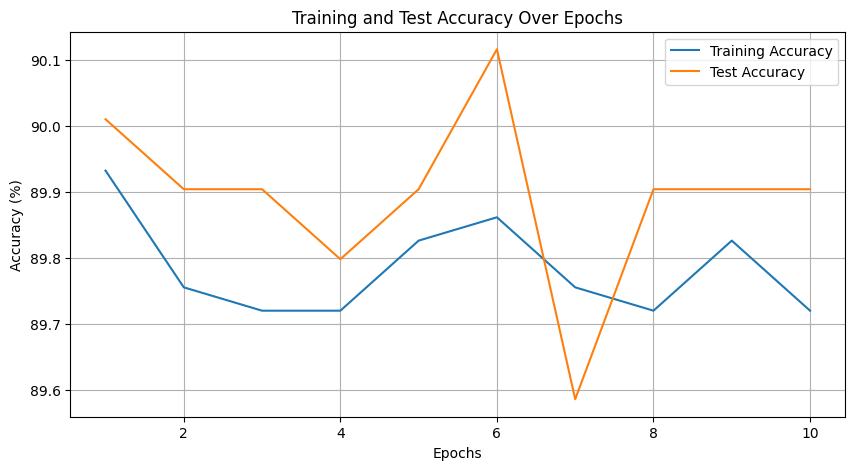

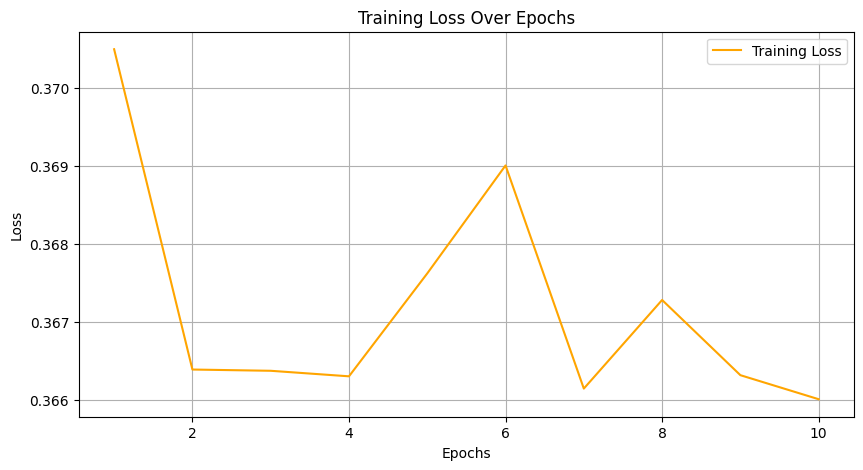

In [212]:
# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=10, shuffle=False)
# Print the number of images in the training and test sets
print(f'Number of images in the training set: {len(train_dataset)}')
print(f'Number of images in the test set: {len(test_dataset)}')

# Lists to store accuracy and loss values for plotting
train_accuracies = []
test_accuracies = []
train_losses = []

#Define the neural network with a hidden layer

# Create an instance of the model


#Define the loss function and optimizer
totalw = 0
totala = 0
totals = 0
totald = 0
totalnothing = 0

totalpw = 0
totalpa = 0
totalps = 0
totalpd = 0
totalpnothing = 0

ivxv = 0

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()  # Set the model to training mode
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear previous gradients

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    avg_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total

    # Store the loss and accuracy
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    model.eval()  # Set the model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # No gradient computation during testing
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Print training loss, training accuracy, and test accuracy for the epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')


with torch.no_grad():  # No gradient computation during testing
    for images, labels in finaltestloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        if predicted == 0:
            totalpw += 1
        if predicted == 1:
            totalpa += 1
        if predicted == 2:
            totalps += 1
        if predicted == 3:
            totalpd += 1
        if predicted == 4:
            totalpnothing += 1
        if labels == 0:
            totalw += 1
        if labels == 1:
            totala += 1
        if labels == 2:
            totals += 1
        if labels == 3:
            totald += 1
        if labels == 4:
            totalnothing += 1
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
print(totalw)
print(totalpw)
print(totala)
print(totalpa)
print(totals)
print(totalps)
print(totald)
print(totalpd)
print(totalnothing)
print(totalpnothing)
test_accuracy = 100 * test_correct / test_total

print(f'Final Test Accuracy: {test_accuracy:.2f}%')

# Plot the training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
with open('hiddenlayermodel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [21]:
with open('hiddenlayermodel.pkl', 'rb') as f:
    model = pickle.load(f)
model.eval()

SimpleNetWithHiddenLayer(
  (hidden): Linear(in_features=90, out_features=5, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=5, out_features=5, bias=True)
)

In [22]:
testable = np.zeros((5, 5))
model.eval()
with torch.no_grad():  # No gradient computation during testing
    for images, labels in finaltestloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        testable[labels][predicted] += 1

accuraciesAndF1s = np.zeros((5, 2))

for i in range(0, 5):
    total = testable.sum()
    TP = testable[i,i]
    FP = testable[:, i].sum() - TP
    FN = testable[i, :].sum() - TP
    TN = total - FP - FN - TP
    P = TP + FN
    N = FP + TN
    PPV = TP / (TP + FP)
    TPR = TP / P
    ACC = (TP + TN) / (total)
    F1 = 2 * (PPV * TPR / (PPV + TPR))
    accuraciesAndF1s[i, 0] = ACC
    accuraciesAndF1s[i, 1] = F1
    
print("Test results: ")
print(testable)
print()
print("Accuracies and F1 Scores: ")
print(accuraciesAndF1s)
print()
print("Total Accuracy: ")
print(np.array([testable[i,i] for i in range(0, 5)]).sum() / testable.sum())
print()
print("F1 Average: ")
print(accuraciesAndF1s[:, 1].sum() / 5)

Test results: 
[[180.   7.   1.   9.   2.]
 [  9. 162.  12.   1.   0.]
 [  1.   9. 148.  15.   0.]
 [  6.  17.  15. 146.   0.]
 [  9.   1.   0.   1. 189.]]

Accuracies and F1 Scores: 
[[0.95319149 0.89108911]
 [0.94042553 0.85263158]
 [0.94361702 0.84813754]
 [0.93191489 0.82022472]
 [0.98617021 0.96675192]]

Total Accuracy: 
0.8776595744680851

F1 Average: 
0.8757669721869139


## How can we increase the accuracy?

Try to modify different parameters of the code and let us know if you could achieve a higher accuract.

## Convolutional Neural Network

We can build a simple Convolutional Neural Network (CNN) for the MNIST dataset. This basic example will help students understand the structure and functionality of CNNs for image classification.

The model consists of two convolutional layers, followed by max pooling and ReLU activation.
The output is flattened and passed through two fully connected layers to produce the final class predictions.

CrossEntropyLoss computes the loss between predicted class probabilities and the true class labels.
Adam optimizer is used for its adaptive learning rate, often providing faster convergence.


In [ ]:
# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()  # ReLU activation function
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Max pooling layer

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer (10 classes for digits 0-9)

    def forward(self, x):
        x = self.relu(self.conv1(x))  # Apply first convolution + ReLU
        x = self.pool(x)  # Apply max pooling
        x = self.relu(self.conv2(x))  # Apply second convolution + ReLU
        x = self.pool(x)  # Apply max pooling again
        x = x.view(-1, 32 * 7 * 7)  # Flatten the output for the fully connected layer
        x = self.relu(self.fc1(x))  # Apply first fully connected layer + ReLU
        x = self.fc2(x)  # Apply output layer
        return x

# Create an instance of the model
model = SimpleCNN()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Used for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.02)  # Adam optimizer for adaptive learning
epochs = 5
# Lists to store accuracy and loss values for plotting
train_accuracies = []
test_accuracies = []
train_losses = []

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()  # Set the model to training mode
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear previous gradients

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    avg_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total

    # Store the loss and accuracy
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    model.eval()  # Set the model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # No gradient computation during testing
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Print training loss, training accuracy, and test accuracy for the epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Plot the training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

RuntimeError: shape '[-1, 2880]' is invalid for input of size 96

In [ ]:
from PIL import Image
import numpy as np

# Function to preprocess and predict a given image
def predict_image(image_path, model):
    model.eval()  # Set the model to evaluation mode
    print(f"Using model: {model.__class__.__name__}")

    # Load and preprocess the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28 pixels
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image_array = (image_array - 0.5) / 0.5  # Normalize to [-1, 1] to match training

    # Check for potential problems like inverted colors
    if image_array.mean() > 0.5:  # If the background is dark and digits are light
        image_array = 1 - image_array  # Invert colors to match MNIST format

    image_tensor = torch.tensor(image_array, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

    # Display the image
    plt.imshow(image_array, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    plt.show()

    # Run the image through the model and get the prediction
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_label = torch.max(output, 1)

    # Print the predicted label
    print(f'Predicted Label: {predicted_label.item()}')

# Test the function with an uploaded image
image_path = '/content/camera_2.png'  # Replace with the path to your image
predict_image(image_path, model)

## The effect of different parameters on the accuracy

The function `train_and_evaluate_model` trains and evaluates a model with the specified hidden layer size, learning rate, and number of epochs.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Function to create a simple NN with variable hidden layer size
class CustomNet(nn.Module):
    def __init__(self, hidden_units=128, activation=nn.ReLU()):
        super(CustomNet, self).__init__()
        self.hidden = nn.Linear(28 * 28, hidden_units)
        self.activation = activation
        self.output = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Function to train and evaluate the model
def train_and_evaluate_model(hidden_units=128, learning_rate=0.001, epochs=5):
    model = CustomNet(hidden_units)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_accuracies = []
    test_accuracies = []
    train_losses = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_losses.append(running_loss / len(trainloader))
        train_accuracies.append(train_accuracy)

        # Evaluation loop
        model.eval()
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

        test_accuracy = 100 * test_correct / test_total
        test_accuracies.append(test_accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}, '
              f'Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies, train_losses

In [ ]:
# Experiment 1: Default parameters
train_acc1, test_acc1, loss1 = train_and_evaluate_model(hidden_units=128, learning_rate=0.001, epochs=5)

# Experiment 2: Change learning rate
train_acc2, test_acc2, loss2 = train_and_evaluate_model(hidden_units=128, learning_rate=0.01, epochs=5)

# Experiment 3: Increase number of hidden units
train_acc3, test_acc3, loss3 = train_and_evaluate_model(hidden_units=256, learning_rate=0.001, epochs=5)

# Experiment 4: Increase number of epochs
train_acc4, test_acc4, loss4 = train_and_evaluate_model(hidden_units=128, learning_rate=0.001, epochs=10)

# Explanation:
# - Experiment with different values for hidden units, learning rates, and number of epochs.
# - Each call will print the training and test accuracy for each epoch.

In [ ]:
# Plot training accuracy comparisons
plt.figure(figsize=(12, 6))
plt.plot(train_acc1, label='Baseline (LR=0.001, Units=128)')
plt.plot(train_acc2, label='Higher LR (LR=0.01)')
plt.plot(train_acc3, label='More Hidden Units (Units=256)')
plt.plot(train_acc4, label='More Epochs (Epochs=10)')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy Comparisons')
plt.legend()
plt.grid(True)
plt.show()

# Plot test accuracy comparisons
plt.figure(figsize=(12, 6))
plt.plot(test_acc1, label='Baseline (LR=0.001, Units=128)')
plt.plot(test_acc2, label='Higher LR (LR=0.01)')
plt.plot(test_acc3, label='More Hidden Units (Units=256)')
plt.plot(test_acc4, label='More Epochs (Epochs=10)')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparisons')
plt.legend()
plt.grid(True)
plt.show()

## Underfitting and Overfitting
Underfitting: Occurs when a model is too simple to capture the underlying patterns in the training data. Both training and test accuracy will be low.

Overfitting: Occurs when a model learns the training data too well, including noise and specific details, leading to high training accuracy but poor test accuracy.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Simple network for underfitting (no hidden layers)
class SimpleNetUnderfit(nn.Module):
    def __init__(self):
        super(SimpleNetUnderfit, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        return self.linear(x)

# Complex network for overfitting (with hidden layers)
class SimpleNetOverfit(nn.Module):
    def __init__(self):
        super(SimpleNetOverfit, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# Function to train the model and collect accuracy data
def train_model(model, epochs=20, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0.0

        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_accuracies.append(train_accuracy)

        # Evaluate test accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies

# Train and evaluate the underfitting model
print("\nUnderfitting Model:")
model_underfit = SimpleNetUnderfit()
train_acc_underfit, test_acc_underfit = train_model(model_underfit, epochs=5)  # Fewer epochs for underfitting

# Train and evaluate the overfitting model
print("\nOverfitting Model:")
model_overfit = SimpleNetOverfit()
train_acc_overfit, test_acc_overfit = train_model(model_overfit, epochs=50)  # More epochs for overfitting

# Plot training and test accuracy curves
plt.figure(figsize=(12, 5))

# Plot for underfitting model
plt.subplot(1, 2, 1)
plt.plot(train_acc_underfit, label='Training Accuracy (Underfit)')
plt.plot(test_acc_underfit, label='Test Accuracy (Underfit)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Underfitting Model Accuracy')
plt.legend()
plt.grid(True)

# Plot for overfitting model
plt.subplot(1, 2, 2)
plt.plot(train_acc_overfit, label='Training Accuracy (Overfit)')
plt.plot(test_acc_overfit, label='Test Accuracy (Overfit)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Overfitting Model Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()